## Bibliotecas
> Se emplea pandas, numpy y matplotlib para el análisis exploratorio y la limpieza de datos

> Se emplea scikit-learn para los modelos y otras transformaciones

> Se emplea Regresión Logística y Support Vector Machine, por ser algoritmos por excelencia de clasificación binaria. [(Machine Learning Algorithms - A Review Batta Mahesh 2018), (Machine Learning: A Review on Binary Classification Roshan Kumari Saurabh Kr. Srivastava 2017)]

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Lectura de Datos

In [6]:
path="./WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = pd.read_csv(path)
print(df.shape)
print(df.head(5))

(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Co

# Limpieza de Datos

> Para la limpieza de datos se toma como apoyo: [Jacqueline Kazil, Katharine Jarmul - Data Wrangling with Python_ Tips and Tools to Make Your Life Easier-O’Reilly Media (2016), Wes McKinney - Python for Data Analysis-O'Reilly Media (2012)]

> Se transforman los sets de prueba y entrenamiento juntos y luego se dividen

In [7]:
#tipos
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#Se corrige el tipo de TotalCharges
df['TotalCharges'].replace([""," "],0.0,inplace=True)
df['TotalCharges']= pd.to_numeric(df.TotalCharges,)

In [10]:
# Inspeccionando valores faltantes
new_df = df.dropna(axis=0,inplace=False,how='any')
print(len(df)-len(new_df)) #Si la diferencia es mayor que 0 existen

0


> Dado que la mayoría de los valores son discretos, se examinan MonthlyCharges,tenure y TotalCharges para discretizarlos mediante grupos

In [11]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [12]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [13]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [14]:
#Función para discretizar
def bins_create(col,num,groups):
    bins = np.linspace(min(col),max(col)+1,num)
    return pd.cut(col, bins, labels=groups, include_lowest=True)

In [15]:
df['catMCharges'] = bins_create(df['MonthlyCharges'],5,['muy bajo','bajo','medio','alto'])
df['catTCharges'] = bins_create(df['TotalCharges'],5,['muy bajo','bajo','medio','alto'])
df['catTenure'] = bins_create(df['tenure'],7,[1,2,3,4,5,6]) #Nótese que esta división es equivalente al año que transcurre de servicio
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,catMCharges,catTCharges,catTenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,muy bajo,muy bajo,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,bajo,muy bajo,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,bajo,muy bajo,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,muy bajo,muy bajo,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,medio,muy bajo,1


In [16]:
#Borramos las columnas no categóricas y el ID que no aporta al modelo
df.drop(['customerID','MonthlyCharges','TotalCharges','tenure'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,catMCharges,catTCharges,catTenure
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,muy bajo,muy bajo,1
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,bajo,muy bajo,3
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,bajo,muy bajo,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,muy bajo,muy bajo,4
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,medio,muy bajo,1


In [17]:
#Veamos si los datos no contienen valores extraños
for col in df.columns:
    print(df[col].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: c

> Codificaremos los datos categóricos en númericos empleando LabelEncoder de scikit-learn

> Guardaremos cada transformador en un diccionario para si fuese necesario decodificar en el futuro

In [18]:
from sklearn import preprocessing


In [19]:
cat_cols = df.select_dtypes(['category','object']).columns
encoders = {}

In [20]:
for col in cat_cols:
    le = preprocessing.LabelEncoder()
    le.fit(df[col])
    print(le.classes_)
    encoders[col] = le
    df[col]=le.transform(df[col])

['Female' 'Male']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'No phone service' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['No' 'No internet service' 'Yes']
['Month-to-month' 'One year' 'Two year']
['No' 'Yes']
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
['No' 'Yes']
['alto' 'bajo' 'medio' 'muy bajo']
['alto' 'bajo' 'medio' 'muy bajo']
[1 2 3 4 5 6]


In [21]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,catMCharges,catTCharges,catTenure
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,3,3,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,1,3,2
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,1,3,0
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,3,3,3
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,2,3,0


# Se divide el dataset en entrenamiento y prueba 

In [22]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

## Examinemos la distribución del dataset de entrenamiento

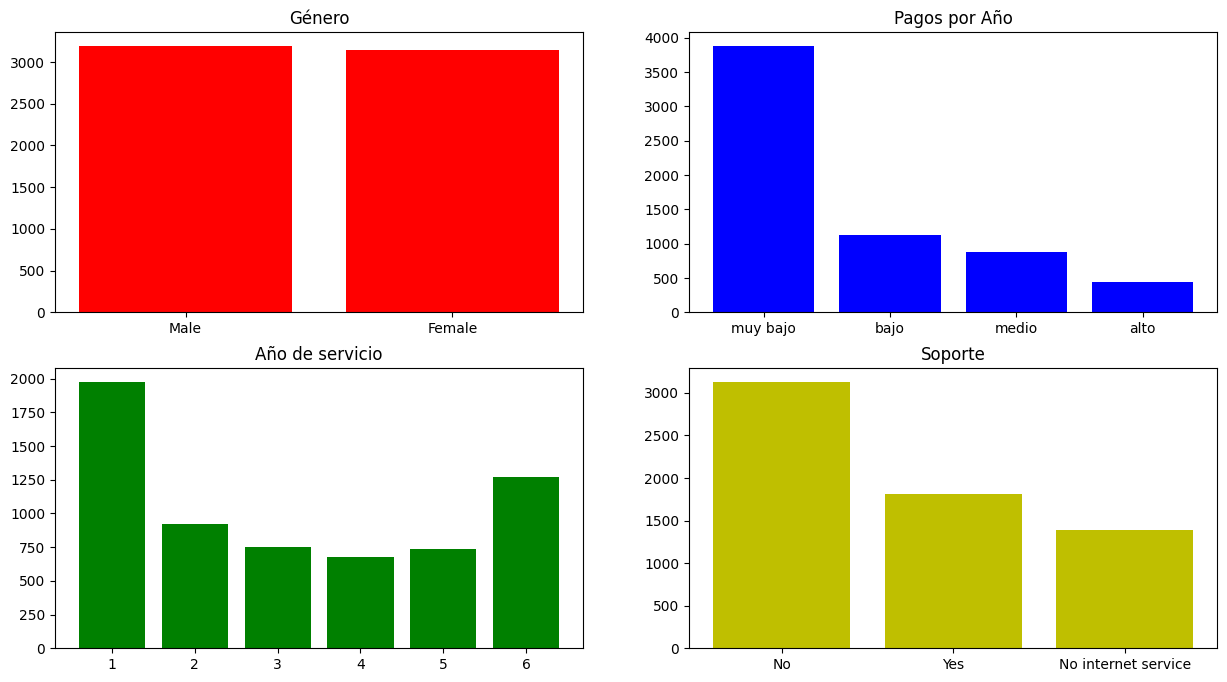

In [23]:
#Veamos graficamente las distribuciones de algunas variables
fig = plt.figure(3,figsize=(15, 8))
fig.clf()

vals= X_train['gender'].value_counts()
ax1 = fig.add_subplot(2,2,1)
ax1.set_title("Género")
ax1.bar(encoders['gender'].inverse_transform(vals.index),vals,align='center',color='r')


vals= X_train['catTCharges'].value_counts()
ax2 = fig.add_subplot(2,2,2)
ax2.set_title("Pagos por Año")
ax2.bar(encoders['catTCharges'].inverse_transform(vals.index),vals,align='center',color='b')

vals= X_train['catTenure'].value_counts()
ax3 = fig.add_subplot(2,2,3)
ax3.set_title("Año de servicio")
ax3.bar(encoders['catTenure'].inverse_transform(vals.index),vals,align='center',color='g')

vals= X_train['TechSupport'].value_counts()
ax4 = fig.add_subplot(2,2,4)
ax4.set_title("Soporte")
ax4.bar(encoders['TechSupport'].inverse_transform(vals.index),vals,align='center',color='y')

plt.show()

In [24]:
y_train.value_counts()

Churn
0    4664
1    1674
Name: count, dtype: int64

In [25]:
pd.Series(encoders['Churn'].inverse_transform(y_train)).value_counts()

No     4664
Yes    1674
Name: count, dtype: int64

> Se observa un marcado desbalance(casi 3 veces el 'No' sobre el 'Si') utilizaremos imbalanced-learn y aplicaremos SMOTE

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train,y_train)
print(y_train_bal.value_counts())

Churn
0    4664
1    4664
Name: count, dtype: int64


> Los datos balanceados, ahora emplearemos los algoritmos. Empezaremos por la regresión logística

> Emplearemos GridSearch para 'tunear' los modelos y obtener buenos valores de los hiperparametros

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import time

# Regresión Logística

> En el caso de la regresión logística se tunea el valor de C así como que solucionador usar. Una buena elección contribuye a mejorar la regularización del algoritmo 

In [30]:
clf_lr = LogisticRegression(random_state=0)

In [31]:
C = np.logspace(-4,4,50)
solver = ['newton-cg','sag','liblinear'] 

parameters = {
    'C':C,
    'solver':solver
} 

clf_lrGS = GridSearchCV(clf_lr,parameters)


In [32]:
ini = time.time()
clf_lrGS.fit(X_train_bal,y_train_bal)
time_lr = time.time() - ini

In [33]:
print(clf_lrGS.best_estimator_.get_params())

{'C': 0.013257113655901081, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


> Se predice con el mejor estimador, este proceso es similar en el resto de los modelos así que no se le adjunta explicación

In [34]:
pred = clf_lrGS.best_estimator_.predict(X_test)

> Métricas

In [35]:
from sklearn.metrics import *

accuracy: 0.7361702127659574
recall: 0.7487179487179487
precision 0.5159010600706714
f1-score 0.610878661087866
ROC-AUC 0.7400452488687783
Tiempo de tuning+fit: 201.83706426620483  seg


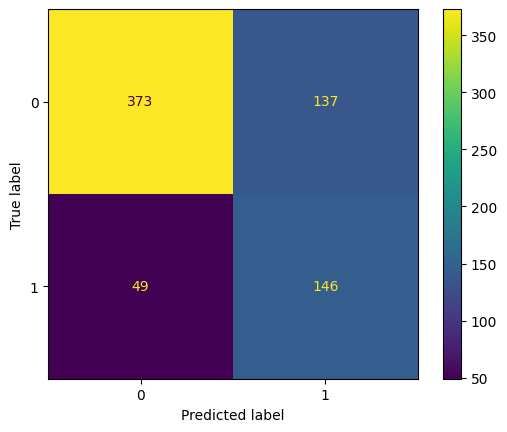

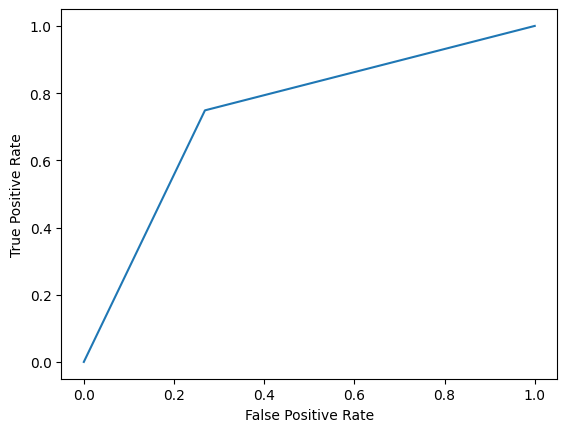

In [36]:
print("accuracy:",accuracy_score(y_test,pred))
print("recall:",recall_score(y_test,pred))
print("precision",precision_score(y_test,pred))
print("f1-score",f1_score(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot() 
fpr, tpr, _ = roc_curve(y_test, pred)
print("ROC-AUC",roc_auc_score(y_test,pred))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("Tiempo de tuning+fit:",time_lr," seg")

# Support Vector Machine (SVM)

> Se tunea el kernel a emplear para modelar la posible no linealidad de los datos y el parámetro C relacionado con la regularización

In [37]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1,5, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

In [38]:
ini = time.time()
clf.fit(X_train_bal,y_train_bal)
time_svm = time.time() - ini

In [39]:
pred = clf.best_estimator_.predict(X_test)

accuracy: 0.7673758865248227
recall: 0.6717948717948717
precision 0.5670995670995671
f1-score 0.6150234741784038
ROC-AUC 0.7378582202111613
Tiempo de tuning+fit: 540.5289587974548  seg


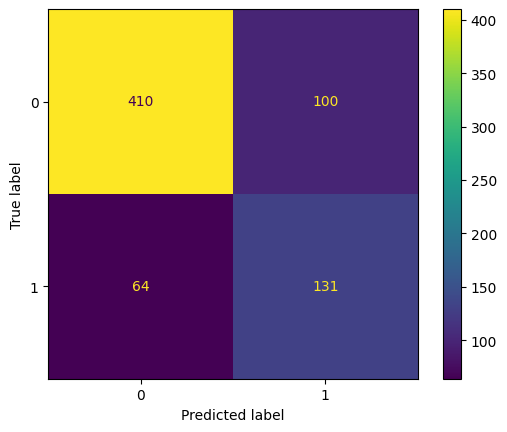

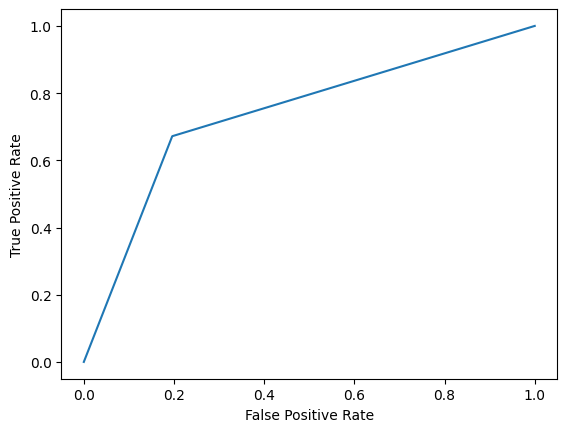

In [40]:
print("accuracy:",accuracy_score(y_test,pred))
print("recall:",recall_score(y_test,pred))
print("precision",precision_score(y_test,pred))
print("f1-score",f1_score(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot() 
fpr, tpr, _ = roc_curve(y_test, pred)
print("ROC-AUC",roc_auc_score(y_test,pred))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("Tiempo de tuning+fit:",time_svm," seg")

In [41]:
#Probaremos entrenar SVM sin balanceo para reducir el tiempo
ini = time.time()
clf.fit(X_train,y_train)
time_svm_nb = time.time() - ini

In [42]:
pred = clf.best_estimator_.predict(X_test)

accuracy: 0.8028368794326242
recall: 0.49743589743589745
precision 0.7028985507246377
f1-score 0.5825825825825827
ROC-AUC 0.7085218702865761
Tiempo de tuning+fit: 188.27780747413635  seg


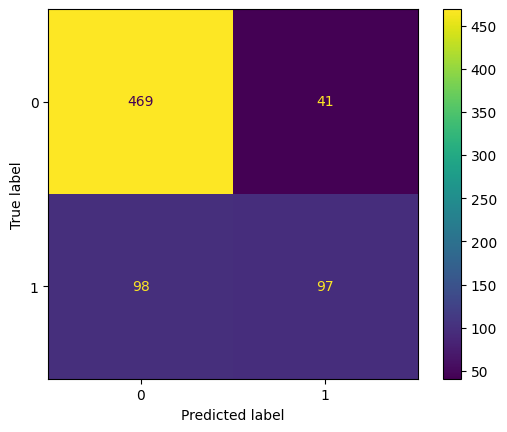

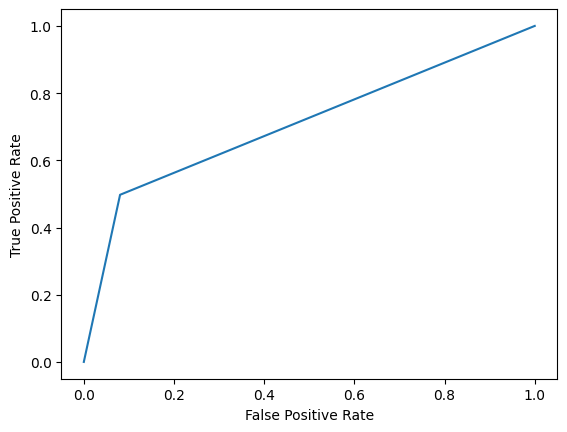

In [43]:
print("accuracy:",accuracy_score(y_test,pred))
print("recall:",recall_score(y_test,pred))
print("precision",precision_score(y_test,pred))
print("f1-score",f1_score(y_test,pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,pred)).plot() 
fpr, tpr, _ = roc_curve(y_test, pred)
print("ROC-AUC",roc_auc_score(y_test,pred))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("Tiempo de tuning+fit:",time_svm_nb," seg")

# Resultados y discución

> Se han entrenado tres modelos, uno correspondiente a Regresión Logística y dos a SVM(balanceado y desbalanceado). La mejor elección resulta el modelo de SVM que entrena con el conjunto de entrenamiento desbalanceado si condensamos lo referente a las métricas y el tiempo de tuning + entrenamiento. Este modelo presenta un accuracy de 0.80, lo que significa que logra predecir la decisión de un cliente 4 de cada 5 veces

>> Además de la bibliografía mencionada fue recurrente el empleo de la documentación de la biblioteca scikit-learn